In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
import seaborn as sns
from datetime import datetime

In [21]:
df = pd.read_csv("/Users/madeleinecarnell/Desktop/project_1.csv", parse_dates=['time'])
df.head(5)

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,2006-01-02,282.77585,41.925180,25.926952,4.663135e-09,4.781004e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03,284.47113,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04,284.28796,16.511415,6.405902,2.910936e-09,4.094447e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05,282.12110,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06,280.89090,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [22]:
# Handling any missing values 
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
print ("No missing values found")

Missing values per column:
 time          0
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64
No missing values found


In [23]:
# Handling Duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_rows}")
df = df.drop_duplicates()


Duplicate Rows: 0


In [24]:
# Dataset stats and basic infomation
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
          TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259 -4.671764e-28 -6.256338e-21   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.006523    284.876413      1.176320      1.503084  5.324608e+01   
std        0.002126      4.99

In [25]:
# GEO SPATIAL DATA

# whilst lat looks right, lon is an invalid term for a co-ordinate.
# but makes sense as a degree out of 360, this thus needs to be coverted between -180 to 180
# Formual: lon = lon - 360 (if lon > 180)

# Convert longitude from [0, 360] range to [-180, 180]
df["lon"] = df["lon"].apply(lambda x: x - 360 if x > 180 else x)
# Verify the changes
print("\nUnique longitudes after conversion:", df["lon"].unique())



Unique longitudes after conversion: [-2.5]


In [26]:
# TEMPRETURE DATA

# Convert from K to C (C = K - 273.15)
# Columns effected, TREFMXAV_U and TREFHT 
# TREFMXAV_U  -> Temp_Max_C
# TREFHT -> Temp_Avg_C

df["Temp_Max_C"] = df["TREFMXAV_U"] - 273.15
df["Temp_Avg_C"] = df["TREFHT"] - 273.15

In [27]:
# SNOW/WEATHER DATA

# Convert from mm/s to mm/day (1 mm/s = K - 273.15)

df["Precipitation_mm_s"] = df["PRECT"]  # Keep original mm/s
df["Precipitation_mm_day"] = df["PRECT"] * 86400  # Convert to mm/day

df["Snowfall_mm_s"] = df["PRSN"]
df["Snowfall_mm_day"] = df["PRSN"] * 86400


In [28]:
# Drop extra columns

df.drop(columns=["TREFMXAV_U", "TREFHT", "PRECT", "PRSN"], inplace=True)


In [29]:
# Rename columns for clarity
df.rename(columns={
    "QBOT": "Humidity_(kg/kg)",
    "UBOT": "Wind_U_(m/s)",
    "VBOT": "Wind_V_(m/s)",
    "FLNS": "Radiation_Longwave_(W/m²)",
    "FSNS": "Radiation_Shortwave_(W/m²)"
}, inplace=True)


In [30]:
# Add in time columns for extra analysis 

df["Year"] = df["time"].dt.year
df["Month"] = df["time"].dt.month
df["Day"] = df["time"].dt.day
df["Hour"] = df["time"].dt.hour
df["DayOfWeek"] = df["time"].dt.dayofweek  # Monday = 0, Sunday = 6
df["Month_Name"] = df["time"].dt.strftime("%B")  # Full month name
df["Day_Name"] = df["time"].dt.strftime("%A")  # Full weekday name


In [31]:
# Check negative values in specified columns
negative_precip_mm_s = (df['Precipitation_mm_s'] < 0).sum()
negative_precip_mm_day = (df['Precipitation_mm_day'] < 0).sum()
negative_snowfall_mm_s = (df['Snowfall_mm_s'] < 0).sum()
negative_snowfall_mm_day = (df['Snowfall_mm_day'] < 0).sum()

# Print the counts of negative values
print(f"Negative values in Precipitation_mm_s: {negative_precip_mm_s}")
print(f"Negative values in Precipitation_mm_day: {negative_precip_mm_day}")
print(f"Negative values in Snowfall_mm_s: {negative_snowfall_mm_s}")
print(f"Negative values in Snowfall_mm_day: {negative_snowfall_mm_day}")


Negative values in Precipitation_mm_s: 1
Negative values in Precipitation_mm_day: 1
Negative values in Snowfall_mm_s: 1048
Negative values in Snowfall_mm_day: 1048


In [32]:
# Replace negative values in those columns with NaN

df.loc[df["Precipitation_mm_s"] < 0, "Precipitation_mm_s"] = np.nan
df.loc[df["Precipitation_mm_day"] < 0, "Precipitation_mm_day"] = np.nan
df.loc[df["Snowfall_mm_s"] < 0, "Snowfall_mm_s"] = np.nan
df.loc[df["Snowfall_mm_day"] < 0, "Snowfall_mm_day"] = np.nan


In [33]:
# Interpolate NaN values

df["Precipitation_mm_s"] = df["Precipitation_mm_s"].replace({-np.inf: np.nan, np.nan: 0}).interpolate()
df["Precipitation_mm_day"] = df["Precipitation_mm_day"].replace({-np.inf: np.nan, np.nan: 0}).interpolate()
df["Snowfall_mm_s"] = df["Snowfall_mm_s"].replace({-np.inf: np.nan, np.nan: 0}).interpolate()
df["Snowfall_mm_day"] = df["Snowfall_mm_day"].replace({-np.inf: np.nan, np.nan: 0}).interpolate()


In [34]:
# Dataset stats and basic infomation
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        Radiation_Longwave_(W/m²)  Radiation_Shortwave_(W/m²)  \
count               27374.000000                27374.000000   
mean                   42.995679                   97.026261   
std                    21.451927                   75.062880   
min                     0.611385                    2.819259   
25%                    26.157544                   31.037187   
50%                    40.777005                   78.443183   
75%                    57.113572                  149.332133   
max                   111.851400                  310.191700   

       Humidity_(kg/kg)  Wind_U_(m/s)  Wind_V_(m/s)           lat      lon  \
count      27374.000000  27374.000000  27374.000000  2.737400e+04  27374.0   
mean           0.006523      1.176320      1.503084  5.324608e+01     -2.5   
std            0.002126      3.066843      2.940138  1.659148e-11      0.0   
min            0.001855     -9.739025     -8.991429  5.324607e+01     -2.5   
25%        

In [35]:
df = df.drop(columns=['Hour'])


In [36]:
df.head()

,time,Radiation_Longwave_(W/m²),Radiation_Shortwave_(W/m²),Humidity_(kg/kg),Wind_U_(m/s),Wind_V_(m/s),lat,lon,Temp_Max_C,Temp_Avg_C,Precipitation_mm_s,Precipitation_mm_day,Snowfall_mm_s,Snowfall_mm_day,Year,Month,Day,DayOfWeek,Month_Name,Day_Name
0,2006-01-02,41.925180,25.926952,0.004769,3.878579,1.394184,53.246075,-2.5,9.62585,5.99288,4.663135e-09,4.028948e-04,4.781004e-17,4.130787e-12,2006,1,2,0,January,Monday
1,2006-01-03,8.905806,10.946910,0.006271,1.788157,3.821703,53.246075,-2.5,11.32113,7.99865,8.046593e-08,6.952256e-03,1.295726e-16,1.119507e-11,2006,1,3,1,January,Tuesday
2,2006-01-04,16.511415,6.405902,0.005782,0.804845,-2.299140,53.246075,-2.5,11.13796,8.07380,2.910936e-09,2.515048e-04,4.094447e-16,3.537602e-11,2006,1,4,2,January,Wednesday
3,2006-01-05,29.948362,9.315041,0.004277,-1.100267,-1.258029,53.246075,-2.5,8.97110,5.24767,7.432505e-11,6.421684e-06,0.000000e+00,0.000000e+00,2006,1,5,3,January,Thursday
4,2006-01-06,19.064156,7.941241,0.003990,-0.706321,-0.938421,53.246075,-2.5,7.74090,4.91378,6.894238e-12,5.956622e-07,0.000000e+00,0.000000e+00,2006,1,6,4,January,Friday


In [37]:
# EDA

In [55]:
# Assuming df is your dataframe with 'Year' and 'Temp_Avg_C' columns
# Create a '5-year interval' column
df['5_year_interval'] = (df['Year'] // 5) * 5

# Group by the 5-year interval and calculate the average temperature for each interval
average_temp_per_5_years = df.groupby('5_year_interval')['Temp_Avg_C'].mean().reset_index()

# Print the result
print(average_temp_per_5_years)

    5_year_interval  Temp_Avg_C
0              2005   10.442318
1              2010   10.626712
2              2015   10.694826
3              2020   10.736061
4              2025   10.818907
5              2030   11.400554
6              2035   11.504546
7              2040   11.528773
8              2045   11.774706
9              2050   12.187540
10             2055   12.524044
11             2060   12.423787
12             2065   12.664919
13             2070   12.804270
14             2075   13.165688
15             2080   13.431543


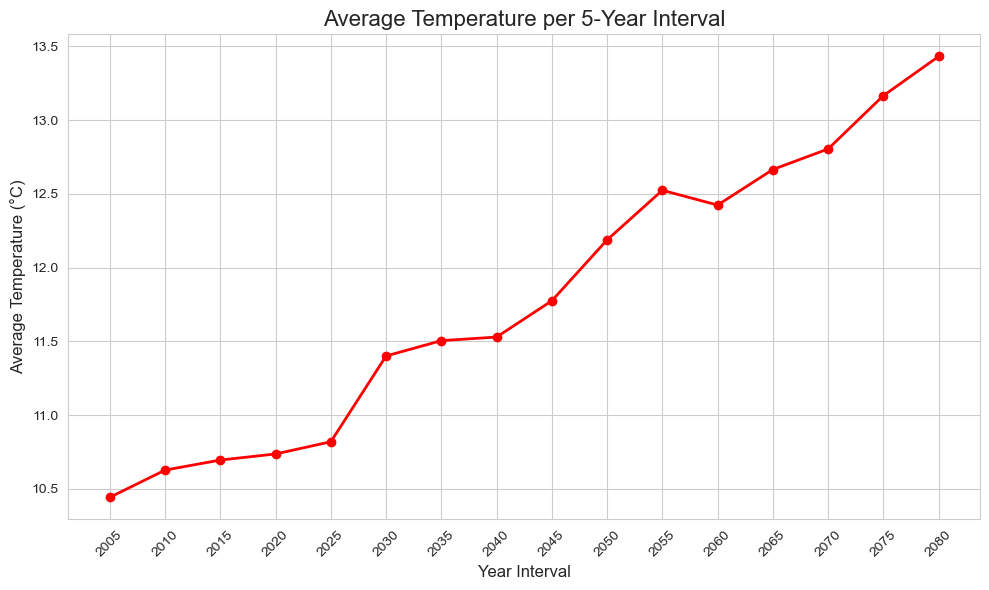

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with 'Year' and 'Temp_Avg_C' columns
df['5_year_interval'] = (df['Year'] // 5) * 5

# Group by the 5-year interval and calculate the average temperature for each interval
average_temp_per_5_years = df.groupby('5_year_interval')['Temp_Avg_C'].mean().reset_index()

# Plotting the average temperature per 5 years
plt.figure(figsize=(10, 6))
plt.plot(average_temp_per_5_years['5_year_interval'], average_temp_per_5_years['Temp_Avg_C'], marker='o', color='r', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Average Temperature per 5-Year Interval', fontsize=16)
plt.xlabel('Year Interval', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)

# Display the plot
plt.grid(True)
plt.xticks(average_temp_per_5_years['5_year_interval'], rotation=45)
plt.tight_layout()
plt.show()


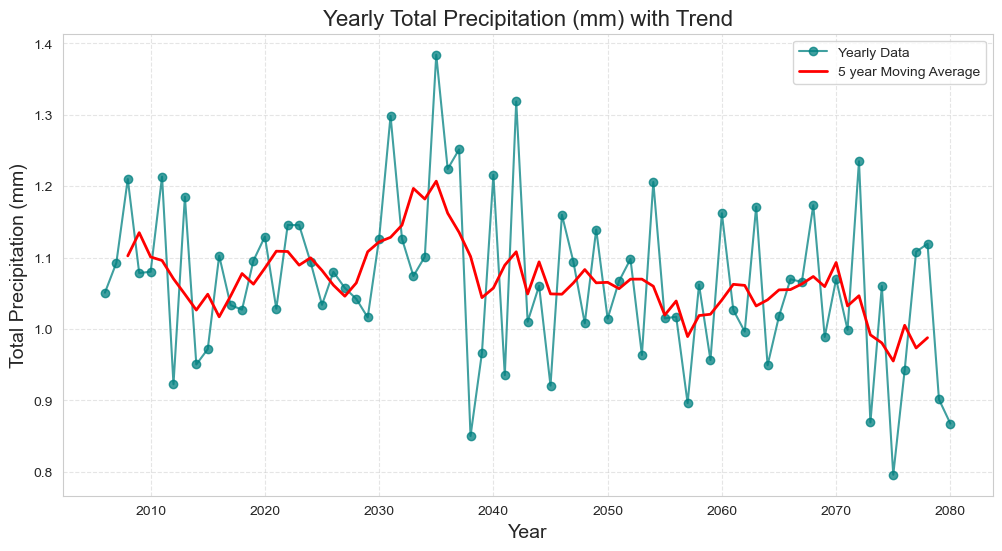

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'Precipitation_mm_day' and 'Year' columns

# Aggregate yearly precipitation
yearly_rain = df.groupby('Year')['Precipitation_mm_day'].sum()

# Compute a rolling average to smooth out fluctuations
rolling_rain = yearly_rain.rolling(window=5, center=True).mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_rain.index, yearly_rain.values, marker='o', linestyle='-', color='teal', alpha=0.75, label="Yearly Data")
plt.plot(yearly_rain.index, rolling_rain, linestyle='-', linewidth=2, color='r', label="5 year Moving Average")

# Labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Precipitation (mm)', fontsize=14)
plt.title('Yearly Total Precipitation (mm) with Trend', fontsize=16)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
